# Cats vs Dogs

In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


In [7]:
InceptionV3().summary()
InceptionV3().get_config()
InceptionV3(include_top=False).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_377 (Convolution2D (None, 149, 149, 32)  896         input_5[0][0]                    
____________________________________________________________________________________________________
batchnormalization_377 (BatchNor (None, 149, 149, 32)  128         convolution2d_377[0][0]          
____________________________________________________________________________________________________
convolution2d_378 (Convolution2D (None, 147, 147, 32)  9248        batchnormalization_377[0][0]     
___________________________________________________________________________________________

{'input_layers': [['input_7', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 299, 299, 3),
    'input_dtype': 'float32',
    'name': 'input_7',
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_7'},
  {'class_name': 'Convolution2D',
   'config': {'W_constraint': None,
    'W_regularizer': None,
    'activation': 'relu',
    'activity_regularizer': None,
    'b_constraint': None,
    'b_regularizer': None,
    'bias': True,
    'border_mode': 'valid',
    'dim_ordering': 'tf',
    'init': 'glorot_uniform',
    'name': 'convolution2d_565',
    'nb_col': 3,
    'nb_filter': 32,
    'nb_row': 3,
    'subsample': (2, 2),
    'trainable': True},
   'inbound_nodes': [[['input_7', 0, 0]]],
   'name': 'convolution2d_565'},
  {'class_name': 'BatchNormalization',
   'config': {'axis': 3,
    'beta_regularizer': None,
    'epsilon': 0.001,
    'gamma_regularizer': None,
    'mode': 0,
    'momentum': 0.99,
    'name': 'batchnormalization_56

In [8]:
VGG19().summary()
VGG19().get_config()
VGG19(include_top=False).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 224, 224, 64)  1792        input_8[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 224, 224, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 112, 112, 64)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [9]:
ResNet50().summary()
ResNet50().get_config()
ResNet50(include_top=False).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_11 (InputLayer)            (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 230, 230, 3)   0           input_11[0][0]                   
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 112, 112, 64)  9472        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [1]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage import img_as_float
from skimage.exposure import equalize_adapthist
from skimage.util import pad
import pickle
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
image_size = 299

In [3]:
X_train_files = os.listdir("./train/")
print(X_train_files[0])
print(len(X_train_files))

cat.11045.jpg
25000


(299, 299, 3)
uint8


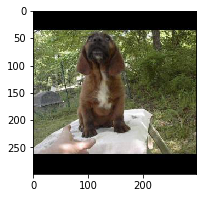

In [4]:
image = imread("./train/dog.5.jpg")
print(image.shape)
print(image.dtype)
plt.figure(figsize=(3,3))
plt.imshow(image)

In [5]:
i = 0
for file in X_train_files:
    image = imread("./train/{}".format(file))
    if image.shape[0] < image.shape[1]:
        padding = (image.shape[1]-image.shape[0])//2
        image = pad(image, ((padding,),(0,),(0,)), 'constant')
    if image.shape[0] > image.shape[1]:
        padding = (image.shape[0]-image.shape[1])//2
        image = pad(image, ((0,),(padding,),(0,)), 'constant')
    image = resize(image, (image_size, image_size)).astype(np.float32)
    imsave("./train/{}".format(file), image)
    i += 1
    if i%1000 == 0:
        print('*', end=' ')

* * * * * * * * * * * * * * * * * * * * * * * * * 

(299, 299, 3)
uint8


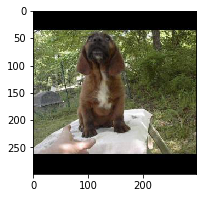

In [5]:
image = imread("./train/dog.5.jpg")
print(image.shape)
print(image.dtype)
plt.figure(figsize=(3,3))
plt.imshow(image)

In [6]:
X_train_files_cat = []
X_train_files_dog = []

for file in X_train_files:
    if "cat" in file:
        X_train_files_cat.append(file)
    if "dog" in file:
        X_train_files_dog.append(file)

print(len(X_train_files_cat))
print(len(X_train_files_dog))

12500
12500


In [7]:
from skimage import img_as_float

def preprocess(images_data):
    """preprocessing function. In this case, CLAHE filter then mean close to 0"""
    #clahe = []
    #for image in images_data:
     #   clahe.append(equalize_adapthist(image).astype(np.float32))
    images_data = img_as_float(images_data).astype(np.float32)
    #return np.array(clahe) - 0.5
    return images_data - 0.5


In [8]:
from sklearn.utils import shuffle as shouff

def batch_train(step, size, X_train_files_cat, X_train_files_dog):
    X_train =[]
    y_train = []
    s = size//2
    for file in X_train_files_cat[0+step*s:s+step*s]:
        image = imread("./train/{}".format(file))
        X_train.append(image)
        y_train.append(0)
    for file in X_train_files_dog[0+step*s:s+step*s]:
        image = imread("./train/{}".format(file))
        X_train.append(image)
        y_train.append(1)
    X_train = np.array(X_train)
    y_train = np.array(y_train).astype(np.uint8)
    X_train, y_train = shouff(X_train, y_train)
    X_train = preprocess(X_train)
    return X_train, y_train

X_train, y_train = batch_train(0, 1000, X_train_files_cat, X_train_files_dog)
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

print('mean: {} std: {} min: {} max: {}'.format(X_train.mean(), X_train.std(), X_train.min(), X_train.max()))

(1000, 299, 299, 3)
(1000,)
float32
uint8
mean: -0.1455143392086029 std: 0.2956322133541107 min: -0.5 max: 0.5


In [9]:
# One Hot encode the labels to the variable y_one_hot
from keras.utils.np_utils import to_categorical
def binary(y):
    y_binary = to_categorical(y).astype(np.float32)
    return y_binary
y_binary = binary(y_train)
print(y_binary.shape)
print(y_binary.dtype)

Using TensorFlow backend.


(1000, 2)
float32


In [10]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.optimizers import Adam
from keras.layers import Input
from keras.layers.core import Dropout
from keras.layers.core import Flatten


base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

"""base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)"""


"""base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)"""

# this is the model we will train
model = Model(input=base_model.input, output=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model.layers[:172]:
    layer.trainable = False
for layer in model.layers[172:]:
    layer.trainable = True

# compile the model (should be done *after* setting layers to non-trainable)
model.compile('adam', 'categorical_crossentropy', ['accuracy'])



In [11]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

model.summary()

0 input_1
1 convolution2d_1
2 batchnormalization_1
3 convolution2d_2
4 batchnormalization_2
5 convolution2d_3
6 batchnormalization_3
7 maxpooling2d_1
8 convolution2d_4
9 batchnormalization_4
10 convolution2d_5
11 batchnormalization_5
12 maxpooling2d_2
13 convolution2d_9
14 batchnormalization_9
15 convolution2d_7
16 convolution2d_10
17 batchnormalization_7
18 batchnormalization_10
19 averagepooling2d_1
20 convolution2d_6
21 convolution2d_8
22 convolution2d_11
23 convolution2d_12
24 batchnormalization_6
25 batchnormalization_8
26 batchnormalization_11
27 batchnormalization_12
28 mixed0
29 convolution2d_16
30 batchnormalization_16
31 convolution2d_14
32 convolution2d_17
33 batchnormalization_14
34 batchnormalization_17
35 averagepooling2d_2
36 convolution2d_13
37 convolution2d_15
38 convolution2d_18
39 convolution2d_19
40 batchnormalization_13
41 batchnormalization_15
42 batchnormalization_18
43 batchnormalization_19
44 mixed1
45 convolution2d_23
46 batchnormalization_23
47 convolution2d_

In [12]:
epoch = 2

## training Loop

In [19]:
from random import shuffle

shuffle(X_train_files_cat)
shuffle(X_train_files_dog)
for step in range(0,24):
    print("epoch: ", epoch, "step: ", step)
    X_train, y_train = batch_train(step, 1000, X_train_files_cat, X_train_files_dog)
    y_binary = binary(y_train)
    # train the model on the new data for a few epochs
    history = model.fit(X_train, y_binary, batch_size=128, nb_epoch=4, validation_split=0.01, verbose = 2)

epoch:  2 step:  0
Train on 990 samples, validate on 10 samples
Epoch 1/4
56s - loss: 0.0157 - acc: 0.9960 - val_loss: 1.1361e-05 - val_acc: 1.0000
Epoch 2/4
34s - loss: 0.0015 - acc: 1.0000 - val_loss: 1.0699e-05 - val_acc: 1.0000
Epoch 3/4
34s - loss: 7.1927e-04 - acc: 1.0000 - val_loss: 9.3761e-06 - val_acc: 1.0000
Epoch 4/4
34s - loss: 7.5431e-04 - acc: 1.0000 - val_loss: 7.1766e-06 - val_acc: 1.0000
epoch:  2 step:  1
Train on 990 samples, validate on 10 samples
Epoch 1/4
34s - loss: 0.0166 - acc: 0.9960 - val_loss: 5.6513e-05 - val_acc: 1.0000
Epoch 2/4
34s - loss: 0.0056 - acc: 0.9990 - val_loss: 3.7945e-04 - val_acc: 1.0000
Epoch 3/4
34s - loss: 0.0014 - acc: 1.0000 - val_loss: 5.4431e-04 - val_acc: 1.0000
Epoch 4/4
34s - loss: 0.0024 - acc: 0.9990 - val_loss: 1.1859e-04 - val_acc: 1.0000
epoch:  2 step:  2
Train on 990 samples, validate on 10 samples
Epoch 1/4
34s - loss: 0.0098 - acc: 0.9949 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/4
34s - loss: 0.0093 - acc: 0.9970 -

In [13]:
step = 24
X_train, y_train = batch_train(step, 1000, X_train_files_cat, X_train_files_dog)
y_binary = binary(y_train)
print("epoch: ", epoch, "step: ", step)
model.evaluate(X_train, y_binary, verbose = 2)


epoch:  2 step:  24


[0.69397256660461426, 0.60399999999999998]

In [21]:
model.save('my_model{}.h5'.format(epoch))
epoch += 1

## end of training loop

In [ ]:
from keras.models import load_model
# load the good one model
model = load_model('my_model2.h5')
print("epoch: ", epoch, "step: ", step)
model.evaluate(X_train, y_binary, verbose = 2)

In [ ]:
X_test_files = os.listdir("./test/")
print(X_test_files[0])
print(len(X_test_files))

In [ ]:


i = 0
for file in X_test_files:
    image = imread("./test/{}".format(file))
    if image.shape[0] < image.shape[1]:
        padding = (image.shape[1]-image.shape[0])//2
        image = pad(image, ((padding,),(0,),(0,)), 'constant')
    if image.shape[0] > image.shape[1]:
        padding = (image.shape[0]-image.shape[1])//2
        image = pad(image, ((0,),(padding,),(0,)), 'constant')
    image = resize(image, (image_size, image_size)).astype(np.float32)
    imsave("./test/{}".format(file), image)
    i += 1
    if i%1000 == 0:
        print('*', end=' ')
        


In [ ]:
image = imread("./test/{}".format(X_test_files[0]))
print(image.shape)
print(image.dtype)
plt.figure(figsize=(3,3))
plt.imshow(image)

In [ ]:
X_test =[]
for file in X_test_files[:500]:
    image = imread("./test/{}".format(file))
    X_test.append(image)
X_test = np.array(X_test)
X_test = preprocess(X_test)

print(X_test.shape)
print(X_test.dtype)
print('mean: {} std: {} min: {} max: {}'.format(X_test.mean(), X_test.std(), X_test.min(), X_test.max()))

In [ ]:
predict = []
for step in range(0,25):
    X_test = []
    for i in range(0+step*500,500+step*500):
        image = imread("./test/{}.jpg".format(i+1))
        X_test.append(image)
    X_test = np.array(X_test)
    X_test = preprocess(X_test)
    predict.append(model.predict(X_test))
print(predict)
print(len(predict))

In [ ]:
predict = np.array(predict)
predict = predict.reshape(-1,2)
print(predict.shape)

In [ ]:
import csv
with open("My_submission2.csv", "w") as csvfile:
    writer = csv.writer(csvfile, lineterminator='\n')
    writer.writerow(['id', 'label'])
    for i in range(len(predict)):
        writer.writerow([i+1, predict[i][1]])
